#DATA CLEANING 
#loading data through pandas,
#General Statistics of a dataframe,
#Data Visualization ,
#Data cleaning fully, 
#Format/Convert data,
#Save data in pickle,

0.Importing packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime
import pickle

In [2]:
# show plots in the notebook
%matplotlib inline

In [3]:
# set plot style 
sns.set(color_codes=True)

In [4]:
#set maximum number of columns to be seen 
pd.set_option('display.max_columns',100)

1. Loading the data

Data Directory

In [11]:
DATA_DIR=os.path.join("..","ml_case_data")
TRAINING_DATA= os.path.join(DATA_DIR,"ml_case_training_data.csv")
HISTORY_DATA=os.path.join(DATA_DIR,"ml_case_training_hist_data.csv")
CHURN_DATA=os.path.join(DATA_DIR,"ml_case_training_output.csv")

In [15]:
train_data=pd.read_csv('ml_case_training_data.csv')
churn_data=pd.read_csv('ml_case_training_output.csv')
history_data=pd.read_csv('ml_case_training_hist_data.csv')


In [16]:
# show first three rows
train_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


In [17]:
# we can also see the Nan values present that will need to be cleaned

In [18]:
# in the dataframe we can see that there is a numeric data and categorical data which will need transformation

In [19]:
churn_data.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


In [20]:
# According to this dataset the data will not need any transformation as everything is correct

In [21]:
history_data.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [22]:
# from our dataset there are alot of zero values 

COMBINING OUR DATAFRAMES

In [23]:
train=pd.merge(train_data,churn_data,on="id")

In [24]:
# Getting the first five rows of the merged dataset 

In [25]:
train.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [26]:
# Getting the last rows of my new dataset

In [27]:
train.tail(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


STATISTICS ON THE DATAFRAME

In [29]:
# Getting the datatypes 
train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [30]:
history_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

DataFrame Statistics

In [32]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [33]:
# from the description we can see that the minimum consumption and forecasts for electricity
#and gas are negative. this could mean that the client companies are producing energy and therefore
# energy should be returned 

In [34]:
#the compaign_disc_ele is an empty column 
train["campaign_disc_ele"].isnull().values.all()

True

In [35]:
# highly skewed data we use percentiles

In [36]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [37]:
# from this dataset we can see negative values in the fix price column but price can not be negative and this is to be solved

MISSING VALUES 

In [38]:
pd.DataFrame({"Missing values(%)":train.isnull().sum()/len(train.index)*100})

,Missing values(%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [39]:
# According to the results we are to remove columns with more misssing values 

In [40]:
pd.DataFrame({"Missing values(%)":history_data.isnull().sum()/len(train.index)*100})

,Missing values(%)
id,0.000000
price_date,0.000000
price_p1_var,8.443091
price_p2_var,8.443091
price_p3_var,8.443091
price_p1_fix,8.443091
price_p2_fix,8.443091
price_p3_fix,8.443091


In [41]:
# For this we can see that the missing values are very few

DATA VISUALIZATION 

In [42]:
# CONCETRATING ON THE MAIN PARAMETERS 

CHURN 

In [43]:
# CHURNING RATE 

In [44]:
churn=train[["id","churn"]]

Rename columns for easy visualization

In [45]:
churn.columns=["Companies","churn"]

In [72]:
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax=dataframe.plot(kind="bar",
                     stacked=True,
                     figsize=size_,
                     rot=rot_,
                     title=title_)
    #Annotate bars 
    annotate_stacked_bars(ax,textsize=14)
    #Rename legend
    plt.legend(["Retention","churn"],loc=legend_)
    #labels
    plt.ylabel("Company base(%)")
    plt.show()
def plot_stacked_bars(ax,pad=0.99,colour="white",textsize=13):
    """
    Add value annotations to the bar 
    """
    #Iterate over the plotted rectangle/bars
    for p in ax.patches:
        #calculate annotation 
        value=str(round(p.get_height(),1))
        #if value is 0 do not annotate 
        if value=='0.0':
            continue 
        ax.annotate(value,
                   ((p.get_x()+ p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),
                   color=colour,
                   size=textsize,
                   )

In [84]:
churn_total=churn.groupby(churn["churn"]).count()
churn_percentage=churn_total/churn_total.sum()*100
churn_percentage

,Companies
churn,
0,90.090706
1,9.909294


In [82]:
train.shape


(16096, 33)

In [83]:
churn_rate=train.churn.value_counts()/16096
churn_rate

0    0.900907
1    0.099093
Name: churn, dtype: float64

SME ACTIVITY 

In [85]:
#Lets show the activity distribution of the companies as well as the sales channel

In [86]:
activity=train[["id","activity_new","churn"]]

In [87]:
activity=activity.groupby([activity["activity_new"],
                          activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0],ascending=False)

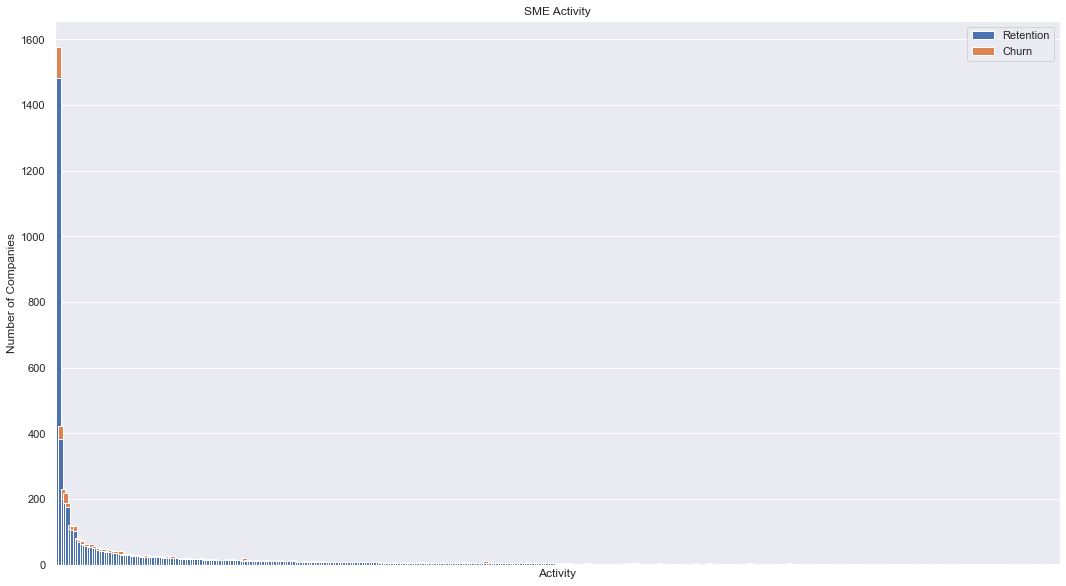

In [88]:
activity.plot(kind="bar",
             figsize=(18,10),
             width=2,
             stacked=True,
             title="SME Activity")
#Labels
plt.ylabel("Number of Companies")
plt.xlabel("Activity")
#Rename legend
plt.legend(["Retention","Churn"],loc="upper right")
#Remove the label for the xticks as the categories are encoded and we can not draw any meaningfrom them yet
plt.xticks([])
plt.show()

we can see that churn is specifically not related to any SME category in particular 

Suppose we look at the values percentage wise

In [89]:
activity_total=activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage=activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn":activity_percentage,
             "Total companies":activity_total}).sort_values(by="Percentage churn",
                                                           ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


If sorted by activity some companies have churneda 100% but this is due to the fact that only a few companies belong to that activity

In [90]:
# How will the SME activity influence the predictive model 


Our predictive model is likely to struggle accurately predicting the SME activity due to the large number of categories and how the number of companies belonging to each company 

SALES CHANNEL 

This seems to be an important feature when predicting the churning of the user . its not the same if the sales were through email or telephone

In [91]:
channel=train[["id","channel_sales","churn"]]

In [92]:
channel=channel.groupby([channel["channel_sales"],
                    channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [93]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

In [94]:
# let us now plot the categories 

In [110]:
plot_stacked_bars (channel_churn ,"Sales Channel",rot_=30)

TypeError: plot_stacked_bars() got an unexpected keyword argument 'rot_'

In [111]:
#let us have them percentage wise 

In [112]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage":channel_percentage,
             "Total companies":channel_total}).sort_values(by="Churn percentage",
                                                           ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


CONSUMPTION

In [114]:
#let us look at the consumption for last year and last month

In [115]:
consumption=train[["id","cons_12m","cons_gas_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [116]:
# the appropriate grapg to use for uni-variate data is ahistogram

In [157]:
def plot_distribution(dataframe,column,ax,bins=50):
    """
    Plot variaable distribution in a stacked histogram of churned or retained company
    """
    # create a temporary dataframe with the data to be plot
    temp=pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                      "Churn":dataframe[dataframe["churn"]==1][column]})
    #plot the histogram 
    temp[["Retention","Churn"]].plot(kind='hist',w=5,a=ax,stacked=True)
    #X-axis label
    ax.set_xlabel(column)
    #Change the x-axis to plain style
    ax.ticklabel_format(style='plain',axis='x')
    

AttributeError: 'Rectangle' object has no property 'w'

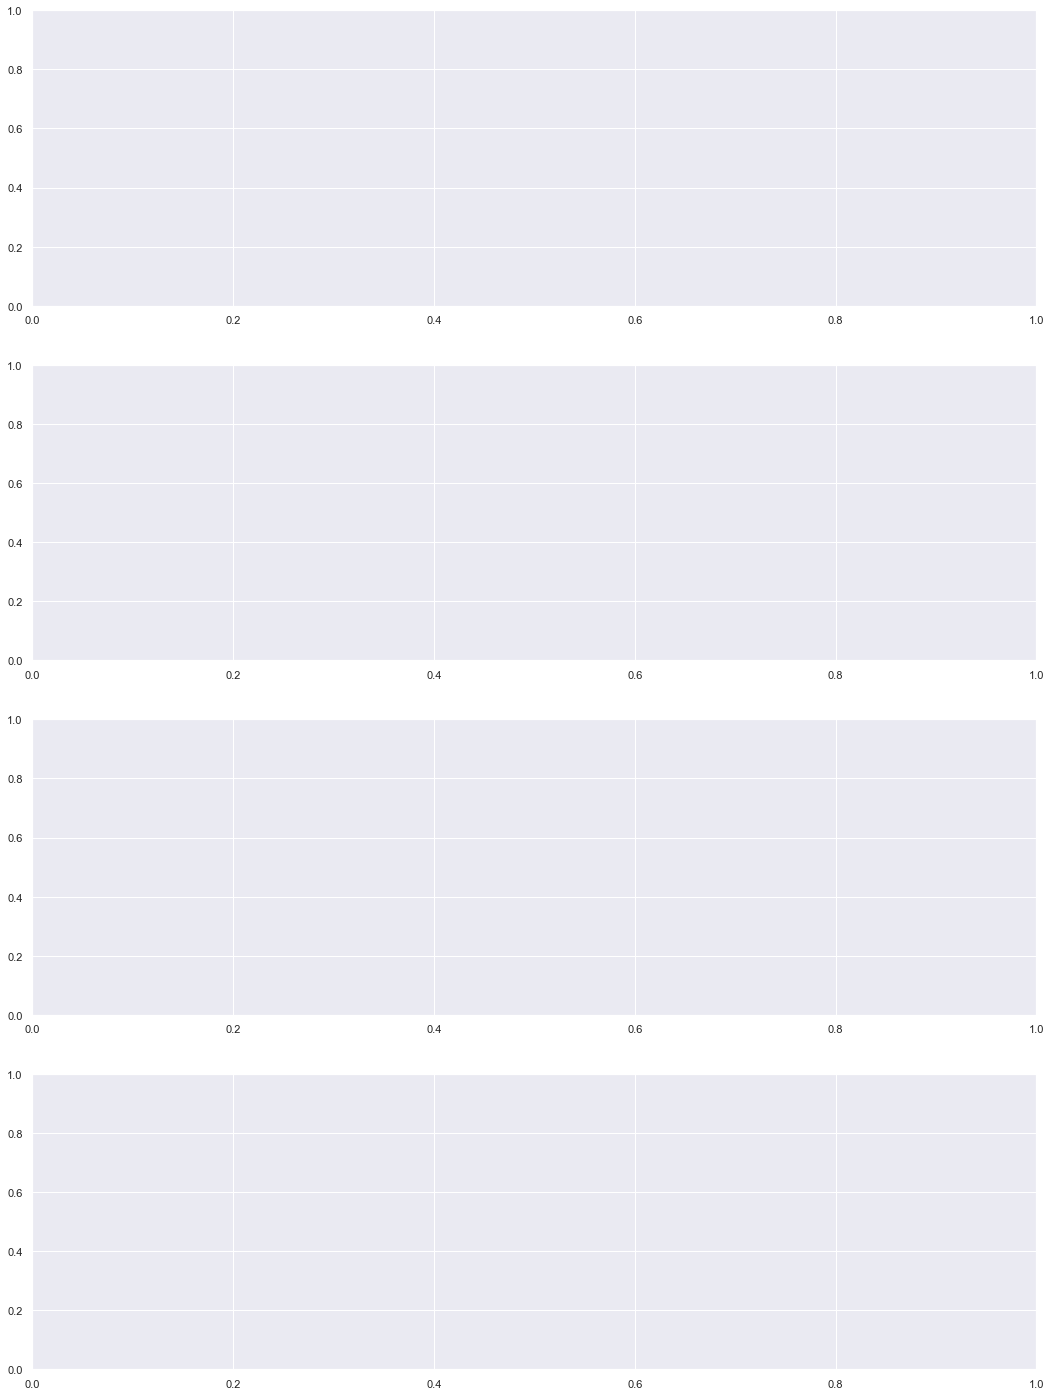

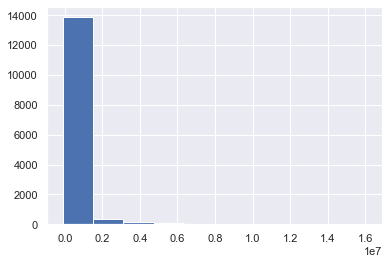

In [158]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
#plot the histogram
plot_distribution(consumption,"cons_12m",axs[0])
#Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"]=="t"],"cons_gas_12m",axs[1])
plot_distribution(consumption,"cons_last_month",axs[2])
plot_distribution(consumption,"imp_cons",axs[3])

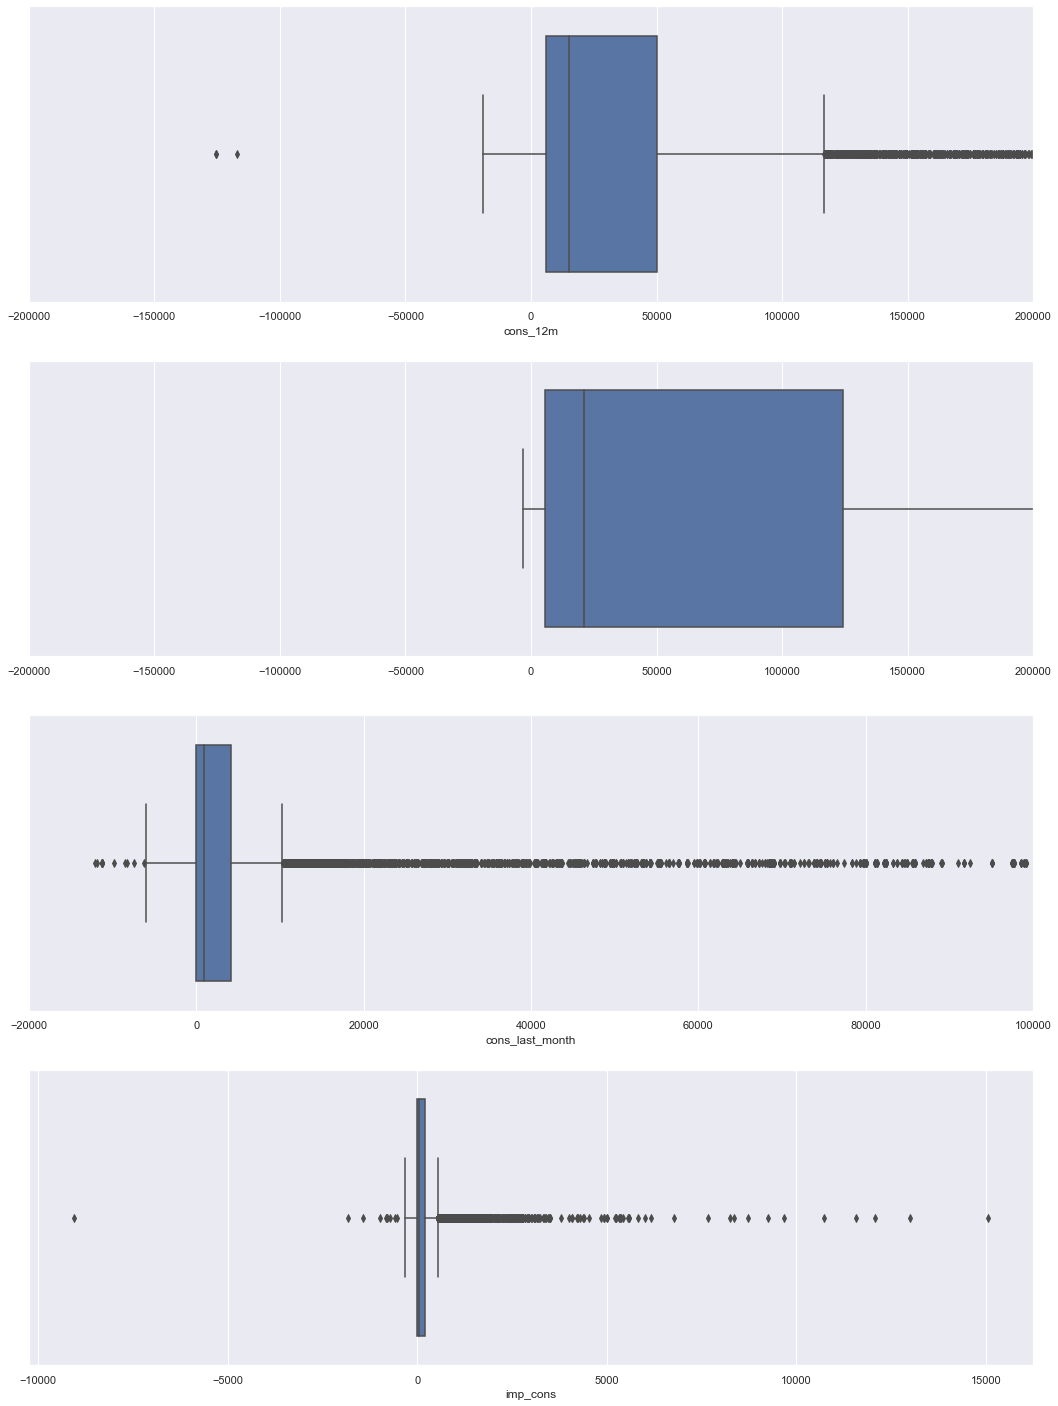

In [130]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
#plot the histogram
sns.boxplot(consumption["cons_12m"],ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"]=="t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption["imp_cons"],ax=axs[3])
#remove the scientific notation 
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
# set x-axis limit
axs[0].set_xlim(-200000,200000)
axs[1].set_xlim(-200000,200000)
axs[2].set_xlim(-20000,100000)
plt.show()











It is very clear now that we have a highly skewed distribution and several outliers

DATES

In [132]:
dates=train[["id","date_activ","date_end","date_modif_prod","date_renewal","churn"]].copy()

In [134]:
#Transform date columns to datetime type
dates["date_activ"]=pd.to_datetime(dates["date_activ"],format='%Y-%m-%d')
dates["date_end"]=pd.to_datetime(dates["date_end"],format='%Y-%m-%d')
dates["date_modif_prod"]=pd.to_datetime(dates["date_modif_prod"],format='%Y-%m-%d')
dates["date_renewal"]=pd.to_datetime(dates["date_renewal"],format='%Y-%m-%d')








In [140]:
def plot_dates(dataframe,column,fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    #Groupby month
    temp=dataframe[[column,
                   "churn",
                   "id"]].set_index(column).groupby([pd.Grouper(freq='M'),"churn"]).count().unstack(level=1)
    #plot
    ax=temp.plot(kind="bar",stacked=True,figsize=(18,10),rot=0)
    #change x-axis labels to months
    ax.set_xticklabels(map(lambda x:line_format(x),temp.index))
    #change the xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename the y axis 
    plt.ylabel("Number of Companies")
    #Rename the legend
    plt.legend(["Retention","Churn"],loc="upper right")
    plt.show()
    
    def line_format(label):
        """
        Convert time label to the format of pandas line plot
        """
        month=label.month_name()[:1]
        if label.month_name()=="January":
            month+= f'\n{label.year}'
        return month

NameError: free variable 'line_format' referenced before assignment in enclosing scope

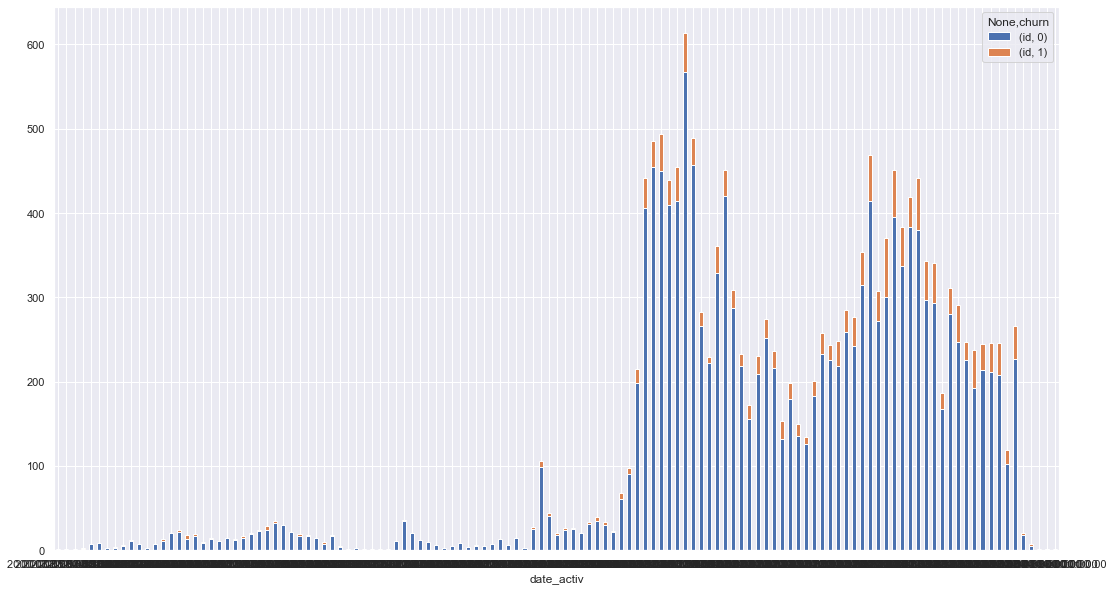

In [141]:
plot_dates(dates,"date_activ",fontsize_=8)

NameError: free variable 'line_format' referenced before assignment in enclosing scope

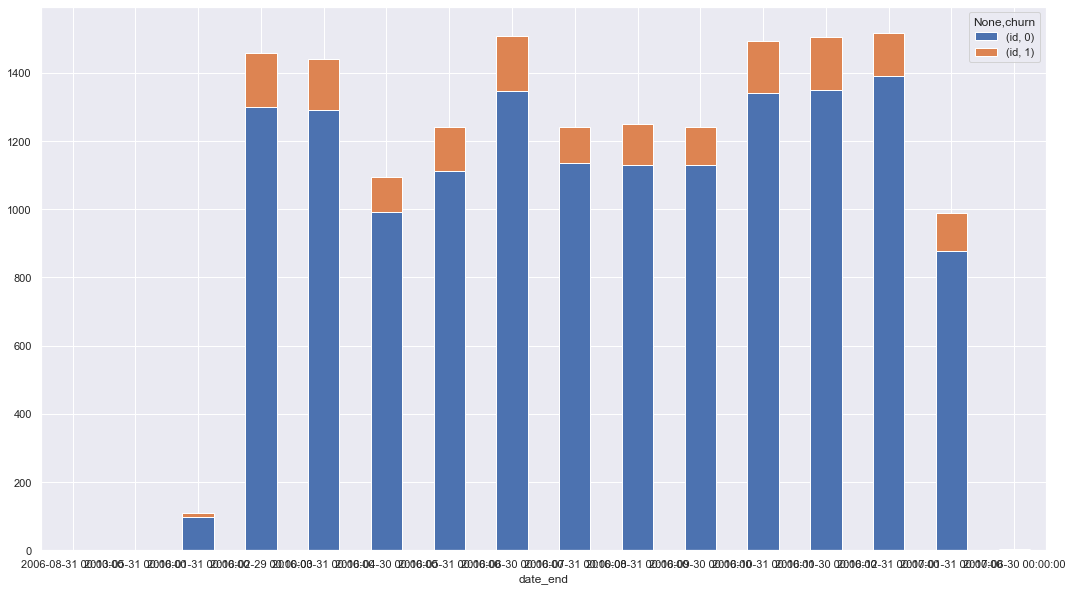

In [142]:
plot_dates(dates,"date_end")

NameError: free variable 'line_format' referenced before assignment in enclosing scope

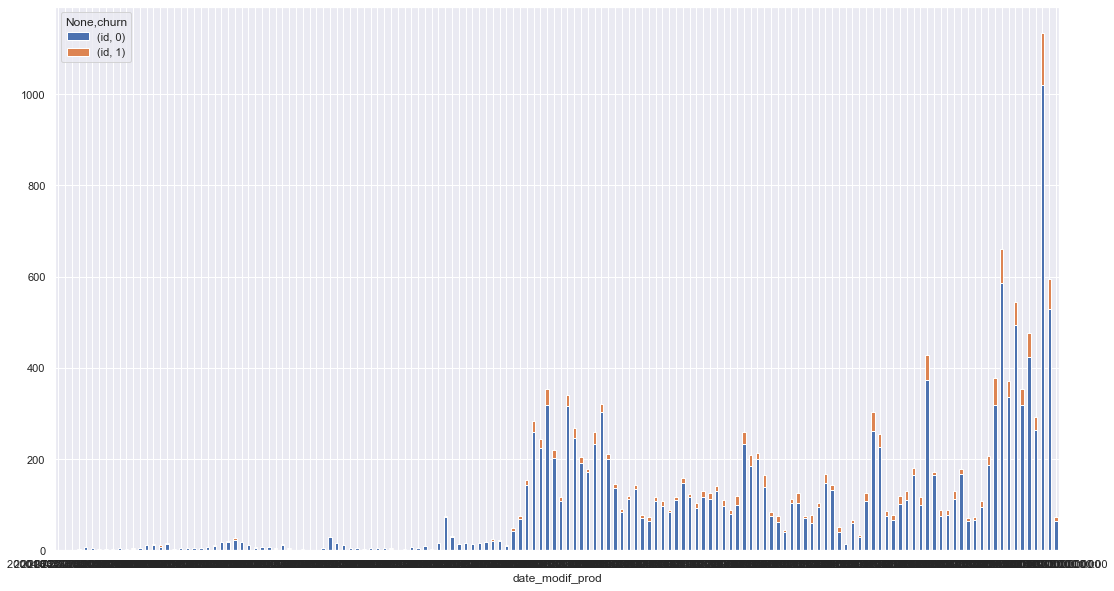

In [143]:
plot_dates(dates,"date_modif_prod",fontsize_=8)

NameError: free variable 'line_format' referenced before assignment in enclosing scope

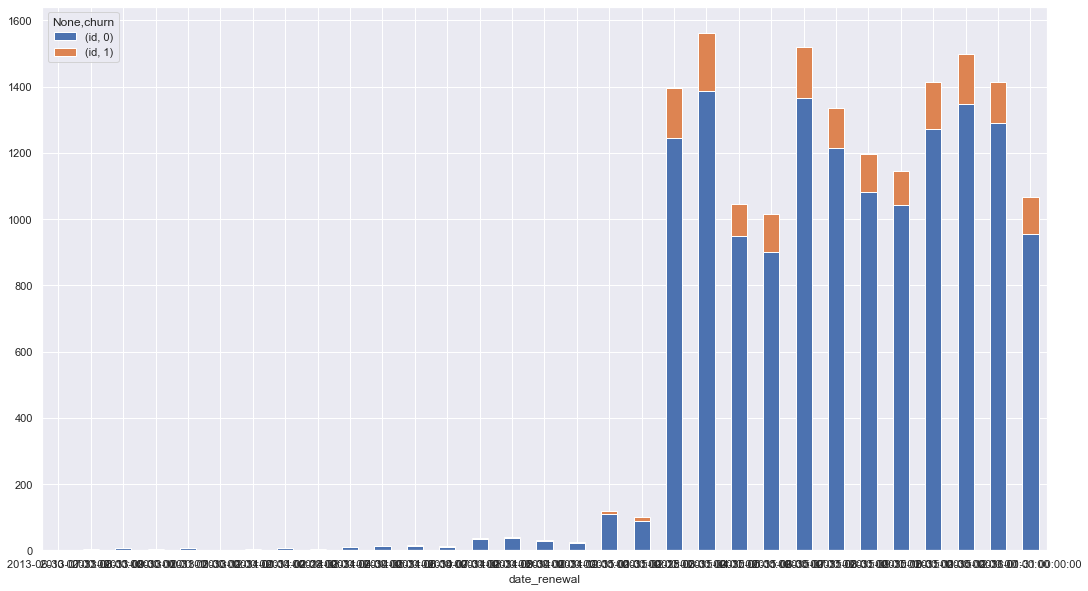

In [144]:
plot_dates(dates,"date_renewal")

In [145]:
# we can visualize the distribution of churned companies according to the date but again this is not enough

FORECAST

In [151]:
forecast=train[["id","forecast_base_bill_ele","forecast_base_bill_year","forecast_bill_12m",
                "forecast_cons","forecast_cons_12m","forecast_cons_year","forecast_discount_energy",
                "forecast_meter_rent_12m","forecast_price_energy_p1","forecast_price_energy_p2",
                "forecast_price_pow_p1","churn"]]
                

AttributeError: 'Rectangle' object has no property 'w'

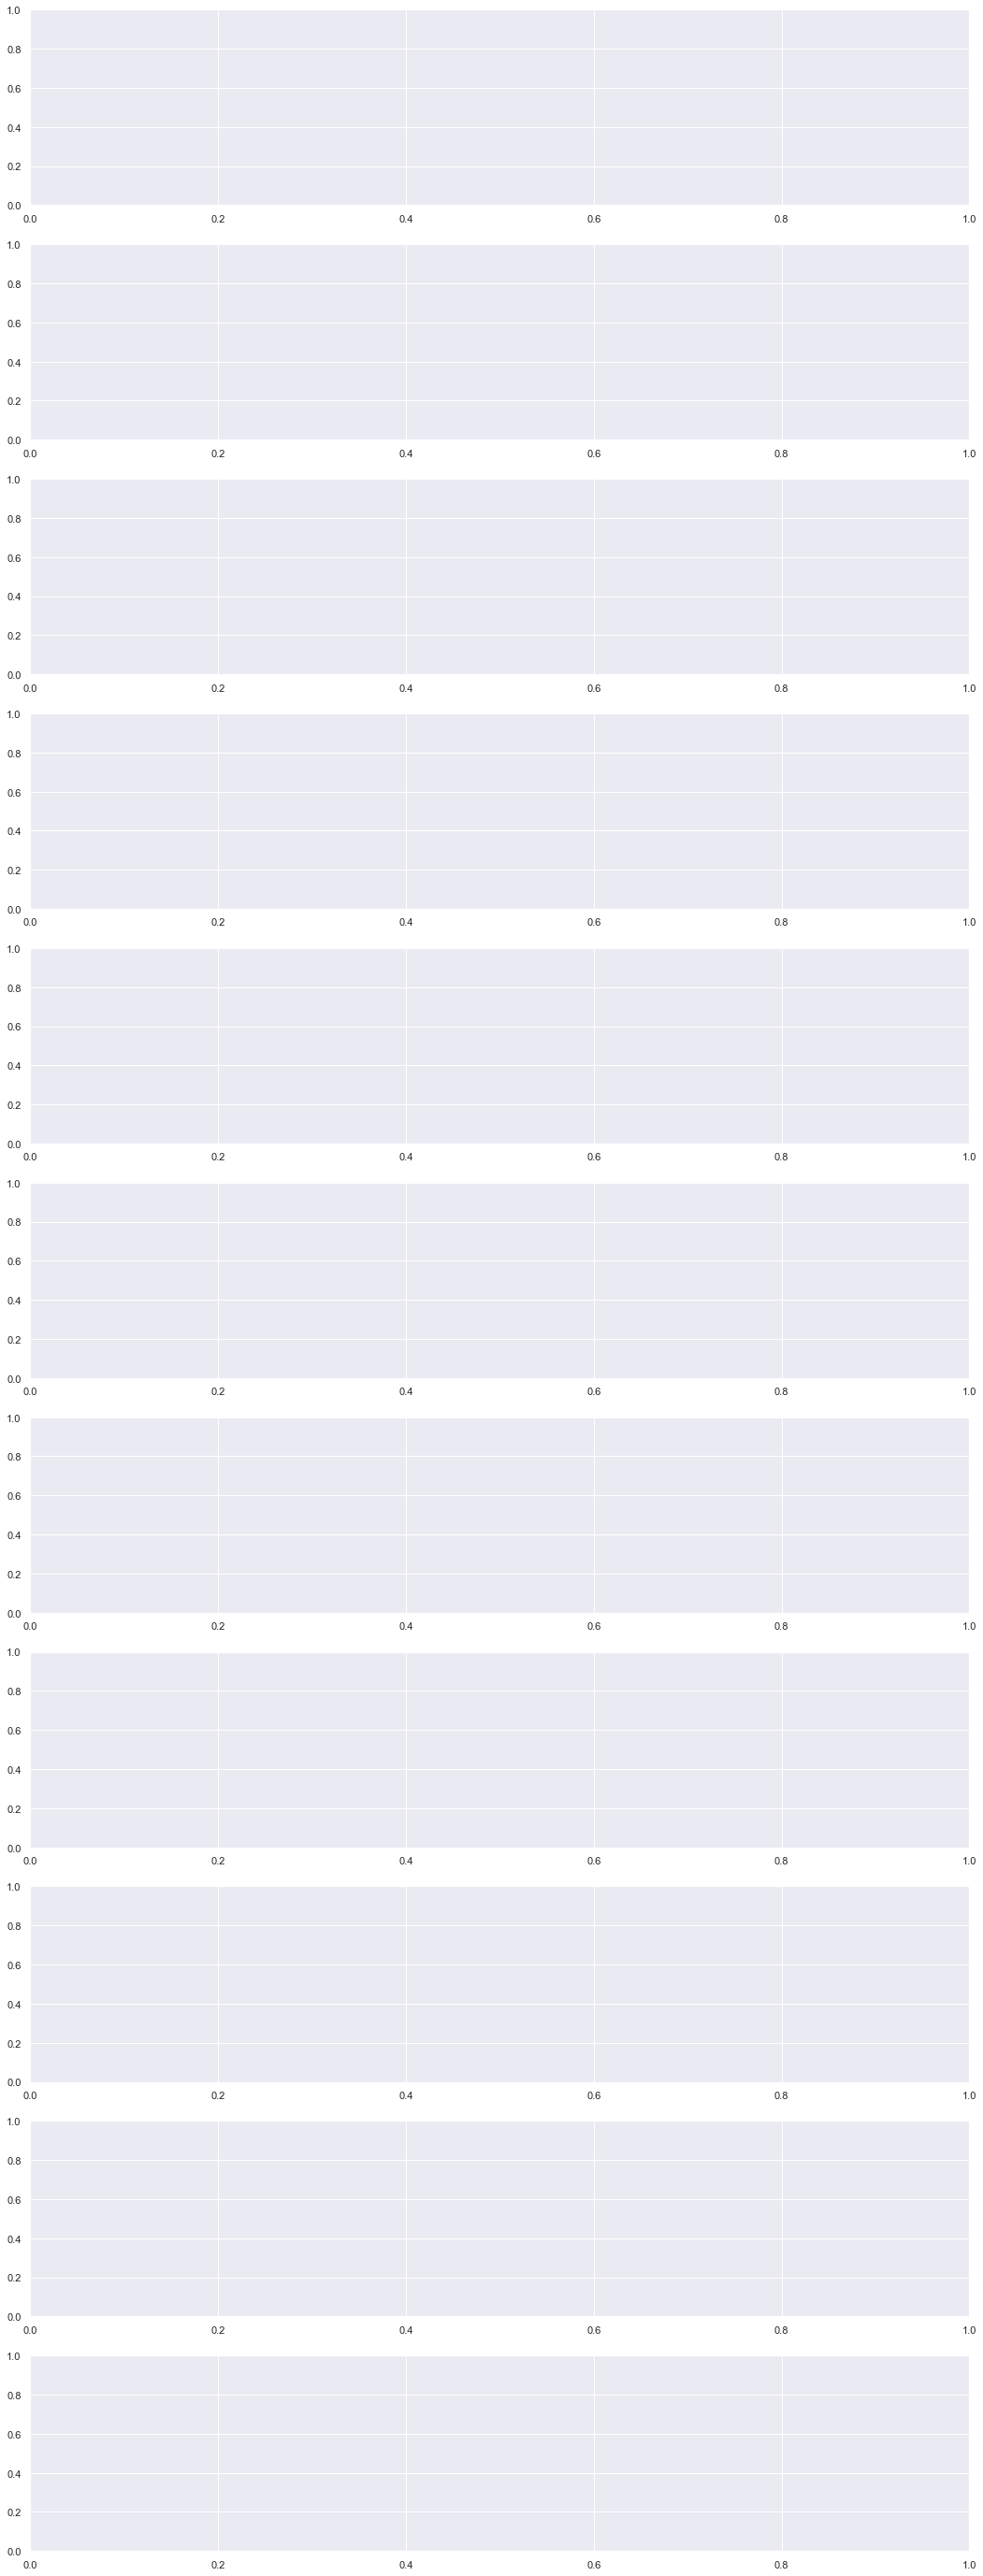

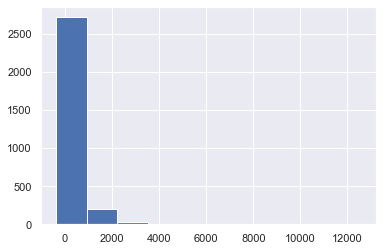

In [159]:
fig,axs=plt.subplots(nrows=11,figsize=(18,50))
#plot the histogram
plot_distribution(train,"forecast_base_bill_ele",axs[0])
plot_distribution(train,"forecast_base_bill_year",axs[1])
plot_distribution(train,"forecast_bill_12m",axs[2])
plot_distribution(train,"forecast_cons",axs[3])
plot_distribution(train,"forecast_cons_12m",axs[4])
plot_distribution(train,"forecast_cons_year",axs[5])
plot_distribution(train,"forecast_discount_energy",axs[6])
plot_distribution(train,"forecast_meter_rent_12m",axs[7])
plot_distribution(train,"forecast_price_energy_p1",axs[8])
plot_distribution(train,"forecast_price_energy_p2",axs[9])
plot_distribution(train,"forecast_price_pow_p1",axs[10])






DATA CLEANING 

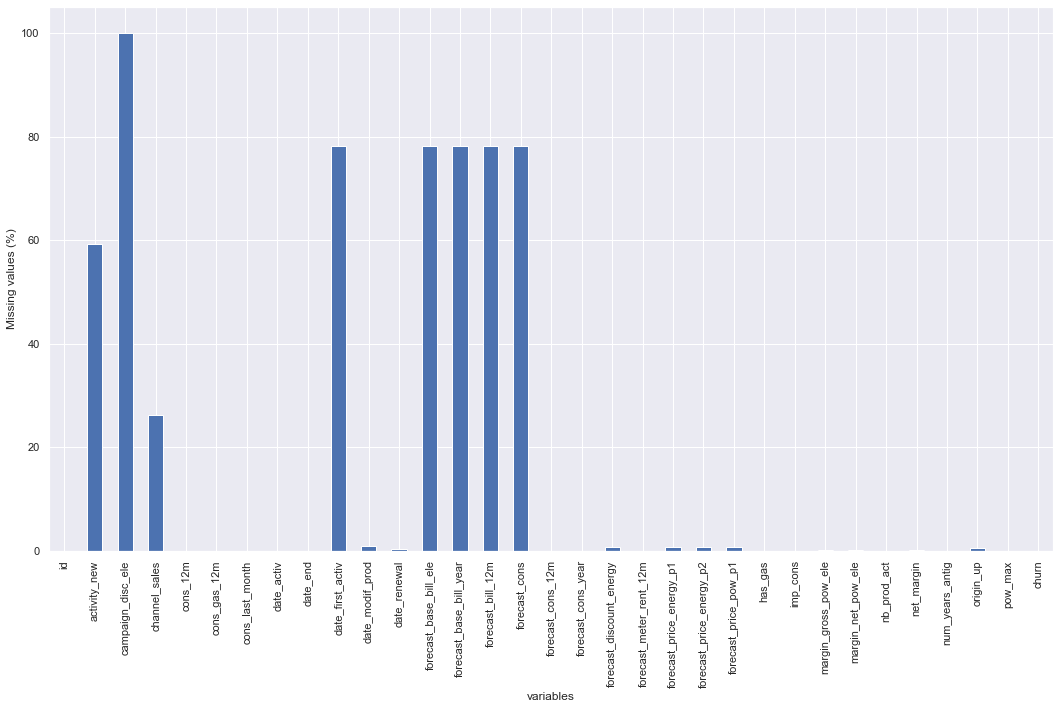

In [160]:
#MISSING DATA
#PLOT THE MISSING DATA 
(train.isnull().sum()/len(train.index)*100).plot(kind="bar",figsize=(18,10))
# set axis labels
plt.xlabel("variables")
plt.ylabel("Missing values (%)")
plt.show()

we will remove the variables with more than 60% of the values missing

*We might re-use some of these variables if our model is not good enough 

In [161]:
train.drop(columns=["campaign_disc_ele","date_first_activ","forecast_base_bill_ele","forecast_base_bill_year",
                   "forecast_bill_12m","forecast_cons"],inplace=True)

In [162]:
# These columns will no longer appear in the dataframe

In [163]:
pd.DataFrame({"Dataframe columns":train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


TAKING CARE OF DUPLICATES

In [164]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [168]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16091    False
16092    False
16093    False
16094    False
16095    False
Length: 16096, dtype: bool

FORMATTING DATA

In [169]:
#MISSING DATES

* We could replace the missing values with the median (the most frequent date)though this can not work for strings or dates so we use .value counts()

In [172]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"]=train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"]=train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"]=train["date_renewal"].value_counts().index[0]


MISSING DATA

In [173]:
#We might have some prices for some companies and months

In [174]:
missing_data_percentage=history_data.isnull().sum()/len(history_data.index)*100

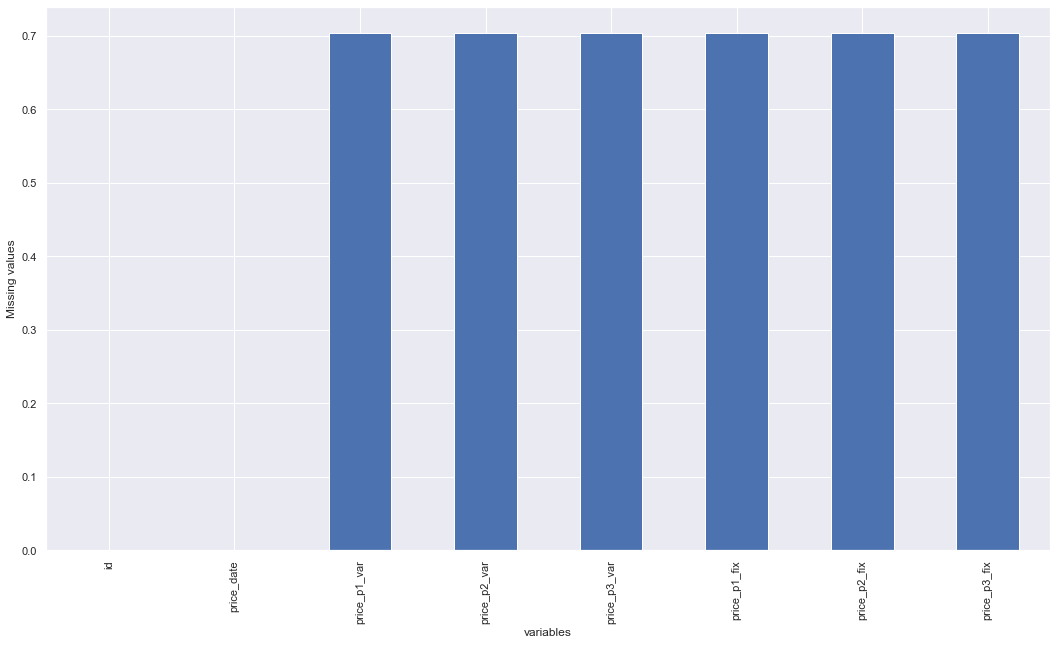

In [175]:
missing_data_percentage.plot(kind="bar",figsize=(18,10))
#set labels
plt.xlabel("variables")
plt.ylabel("Missing values")
plt.show()

* we can now subsitute the missing values with median which is the best option to undertake since missing values are not too many

In [177]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"]=history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"]=history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"]=history_data["price_p3_var"].median()

history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"]=history_data["price_p1_fix"].median()

history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"]=history_data["price_p2_fix"].median()

history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"]=history_data["price_p3_fix"].median()

FORMATTING DATES(TRAIN DATA)

In [179]:
# In order to use the dates in our churn prediction model we are going to change the representstion of these dates.
#we will format it in the number of months and in order to do this transformation 
# We shall change the dates to datetime and create a reference date which will be January 2016

In [180]:
#Convert date columns to datetime types
train["date_activ"]=pd.to_datetime(dates["date_activ"],format='%Y-%m-%d')
train["date_end"]=pd.to_datetime(dates["date_end"],format='%Y-%m-%d')
train["date_modif_prod"]=pd.to_datetime(dates["date_modif_prod"],format='%Y-%m-%d')
train["date_renewal"]=pd.to_datetime(dates["date_renewal"],format='%Y-%m-%d')


formatting dates 

In [181]:
history_data["price_date"]=pd.to_datetime(history_data["price_date"],format='%Y-%m-%d')

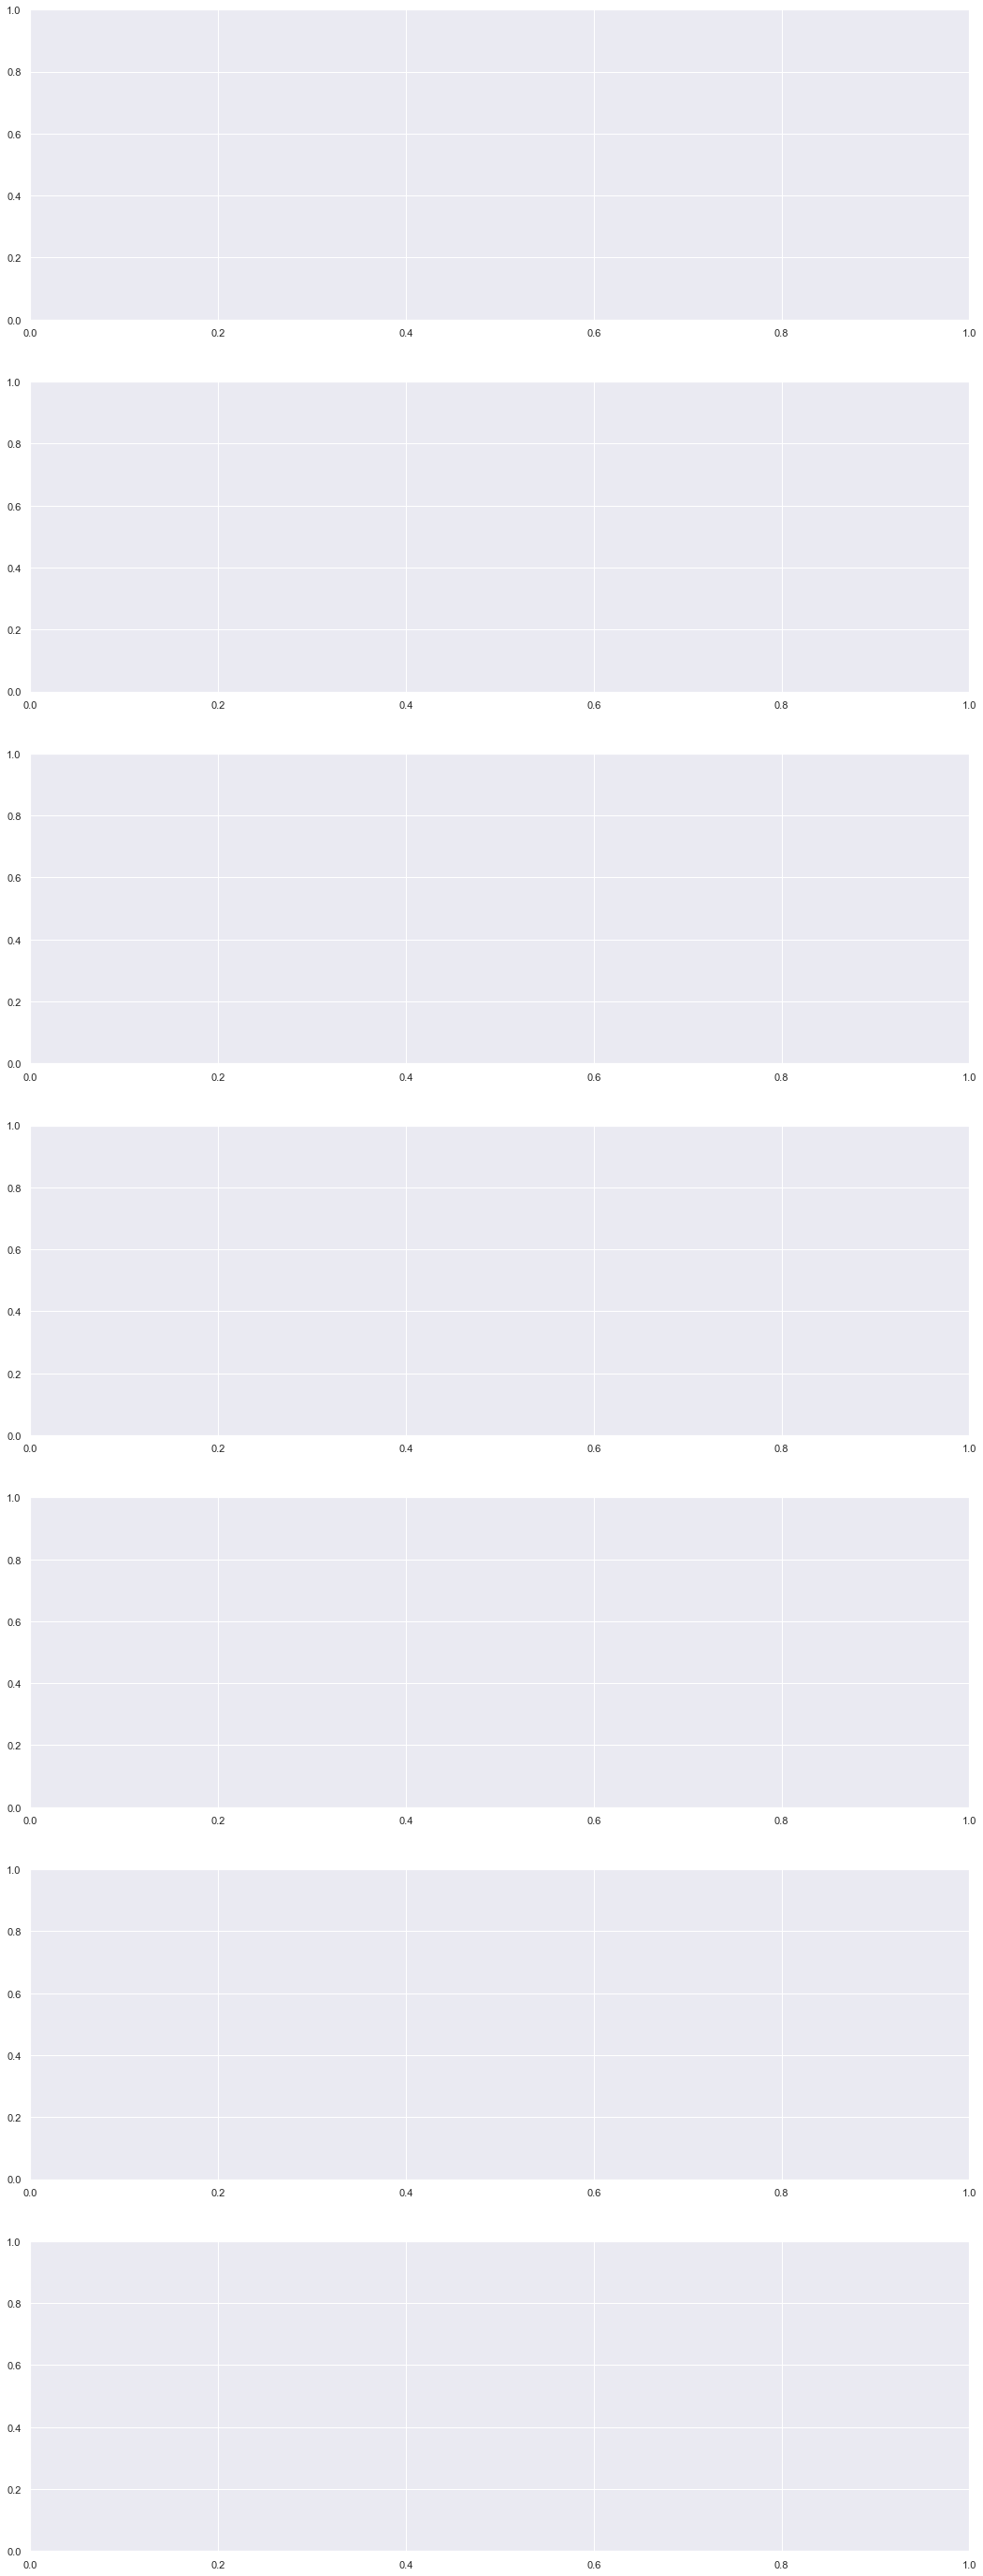

In [182]:
fig,ax=plt.subplots(nrows=7,figsize=(18,50))
#plot the boxplots
sns.boxplot((train["cons_12m"].dropna()),ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()),ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()),ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()),ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()),ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()),ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()),ax=axs[6])
plt.show()

NEGATIVE DATA

In [183]:
#LOOKING AT THE HISTORICAL PRICING DATA

In [184]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see some of the negative values in the price columns and we can replace the negative values with the median 

In [185]:
history_data[history_data.price_p1_fix<0|(history_data.price_p2_fix<0)|(history_data.price_p3_fix<0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [186]:
history_data.loc[history_data["price_p1_fix"]<0,"price_p1_fix"]=history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"]<0,"price_p2_fix"]=history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"]<0,"price_p3_fix"]=history_data["price_p3_fix"].median()






PICKLING

Its needed for making data persistent so that it can be saved and continue with it later

In [191]:
if not os.path.exists(os.path.join("..","..\\processed_data")):
    os.makedirs(os.path.join("..","..\\processed_data"))

In [193]:
PICKLE_TRAIN_DIR=os.path.join("..","..\\processed_data","train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join("..","..\\processed_data","history_data.pkl")

In [194]:
pd.to_pickle(train,PICKLE_TRAIN_DIR)
pd.to_pickle(history_data,PICKLE_HISTORY_DIR)